# Aim : Apply subset selection(feature selection) techniques on the mobile data set.

# A) Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("mobile_dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.shape

(2000, 21)

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
X = df.iloc[:,:-1]
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [6]:
y = df.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [7]:
ordered_rank_features = SelectKBest(score_func = chi2, k = 20)
ordered_feature = ordered_rank_features.fit(X,y)

In [8]:
dfscores = pd.DataFrame(ordered_feature.scores_,columns = ["Score"])
dfcolumns = pd.DataFrame(X.columns)

In [9]:
features_rank = pd.concat([dfcolumns,dfscores],axis = 1)

In [10]:
features_rank.columns = ['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [11]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# FEATURE IMPORTANCE

This technique gives you a score for each feature of your data, the higher the score more relevant it is

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [13]:
print(model.feature_importances_)

[0.06203914 0.01975002 0.03366966 0.01987314 0.03318985 0.01728969
 0.03512693 0.03387047 0.03567435 0.03298925 0.03309173 0.04751094
 0.04879859 0.38957945 0.03450575 0.03443831 0.0358312  0.01430328
 0.01832221 0.02014603]


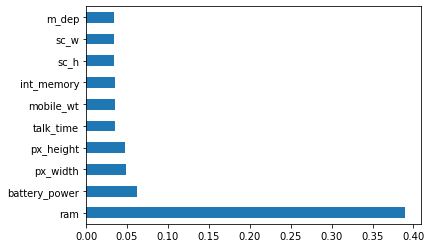

In [14]:
ranked_features = pd.Series(model.feature_importances_,index  = X.columns)
ranked_features.nlargest(10).plot(kind = 'barh')
plt.show()

# Correlation

<AxesSubplot:>

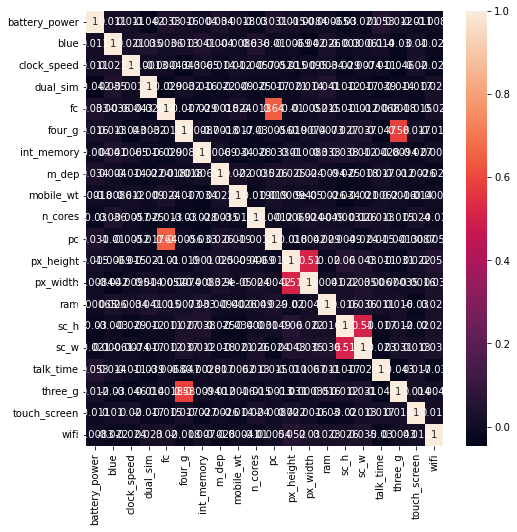

In [15]:
corr = df.iloc[:,:-1].corr()
top_features = corr.index
plt.figure(figsize = (8,8))
sns.heatmap(df[top_features].corr(),annot = True)

# Information Gain

In [16]:
from sklearn.feature_selection import mutual_info_classif

In [17]:
mutual_info = mutual_info_classif(X,y)

In [18]:
mutual_data = pd.Series(mutual_info,index = X.columns)
mutual_data.sort_values(ascending = False)

ram              0.845182
px_width         0.033011
battery_power    0.029664
px_height        0.027742
pc               0.025714
mobile_wt        0.018324
m_dep            0.010487
n_cores          0.008594
wifi             0.006653
sc_w             0.004463
dual_sim         0.000407
four_g           0.000000
int_memory       0.000000
blue             0.000000
fc               0.000000
clock_speed      0.000000
sc_h             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
dtype: float64